In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimehta/nasa-asteroids-classification")

print("Path to dataset files:", path)

100%|██████████| 3.27M/3.27M [00:00<00:00, 88.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shrutimehta/nasa-asteroids-classification/versions/1


In [5]:
import pandas as pd
import os

# Caminho para o arquivo CSV
csv_path = os.path.join(path, 'nasa.csv')

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(csv_path)

# Mostrar as primeiras linhas do DataFrame
print(df.head())


   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762        

In [7]:

print(df.columns)

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')


# **Legenda**

**1. Neo Reference ID:**
• Um identificador único para o objeto próximo à Terra (Near-Earth Object, NEO).

**2. Name:**
• Nome ou número designado ao asteroide.

**3. Absolute Magnitude:**
• Brilho intrínseco do asteroide em uma escala logarítmica.
 Quanto menor o número, mais brilhante o objeto.

**4. Est Dia in KM (max/min):**
• Estimativa do diâmetro máximo e mínimo em quilômetros.

**5. Est Dia in M (max/min):**
• Estimativa do diâmetro máximo e mínimo em metros.

**6. Est Dia in Miles (max/min):**
• Estimativa do diâmetro máximo e mínimo em milhas.

**7. Est Dia in Feet (max/min):**
• Estimativa do diâmetro máximo e mínimo em pés.

**8. Asc Node Longitude:**
• Longitude do nó ascendente: um dos parâmetros orbitais que indicam onde a órbita do asteroide cruza o plano da eclíptica.

**9. Orbital Period:**
• Tempo (em dias ou anos) que o asteroide leva para completar uma órbita ao redor do Sol.

**10. Perihelion Distance:**
• Distância mínima do asteroide ao Sol durante sua órbita (em unidades astronômicas, AU).

**11. Perihelion Arg (Argumento do Periélio):**
• Indica a orientação da órbita do asteroide em relação ao Sol.

**12. Aphelion Dist:**
• Distância máxima do asteroide ao Sol durante sua órbita (em AU).

**13. Perihelion Time:**
• Tempo (em dias julianos ou outro formato) em que o asteroide estará no periélio (ponto mais próximo do Sol).

**14. Mean Anomaly:**
• Medida angular que indica a posição do asteroide em sua órbita em um determinado momento.

**15. Mean Motion:**
• Velocidade orbital média do asteroide (em graus por dia).

**16. Equinox:**
• Sistema de referência utilizado para os elementos orbitais (e.g., J2000 refere-se ao sistema de coordenadas do ano 2000).

**17. Hazardous:**
• Indica se o asteroide é potencialmente perigoso para a Terra (True/False).

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# Converter a coluna 'Hazardous' para valores numéricos (True = 1, False = 0)
df['Hazardous'] = df['Hazardous'].astype(int)
# Selecionar as variáveis relevantes
features = [
   'Absolute Magnitude', 'Est Dia in KM(max)', 'Perihelion Distance',
   'Aphelion Dist', 'Orbital Period', 'Perihelion Time','Mean Motion', 'Mean Anomaly'
]
X = df[features]
y = df['Hazardous']

# Tratar valores nulos (substituir por mediana como exemplo)
X = X.fillna(X.median())

# Configurar validação cruzada Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [3, 5, 7],
   'learning_rate': [0.01, 0.1, 0.2],
   'subsample': [0.8, 1.0],
   'colsample_bytree': [0.8, 1.0]
}
# Configurar o GridSearchCV
grid_search = GridSearchCV(
   estimator=xgb_model,
   param_grid=param_grid,
   scoring='accuracy',
   cv=kf,
   verbose=1,
   n_jobs=-1
)
# Executar o GridSearchCV
grid_search.fit(X, y)

# Resultados do GridSearchCV
print("\n--- Melhores Hiperparâmetros ---")
print(grid_search.best_params_)
print(f"Melhor Acurácia: {grid_search.best_score_:.4f}")

# Avaliar o modelo final
best_model = grid_search.best_estimator_

# Importância das variáveis
feature_importances = pd.DataFrame({
   'Feature': features,
   'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:00:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Melhores Hiperparâmetros ---
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Melhor Acurácia: 0.8961


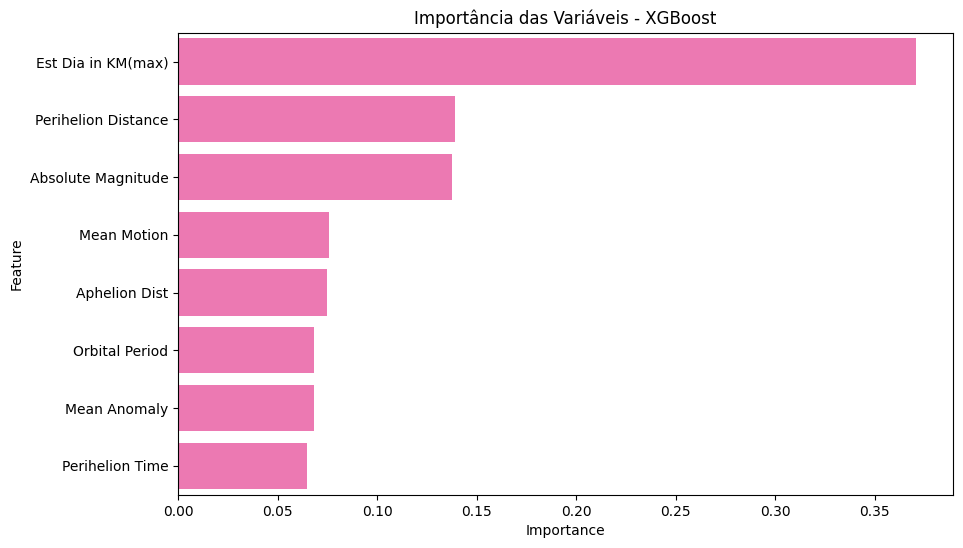

In [22]:
# Visualizar importâncias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color='#FF66B2')
plt.title('Importância das Variáveis - XGBoost')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:24:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


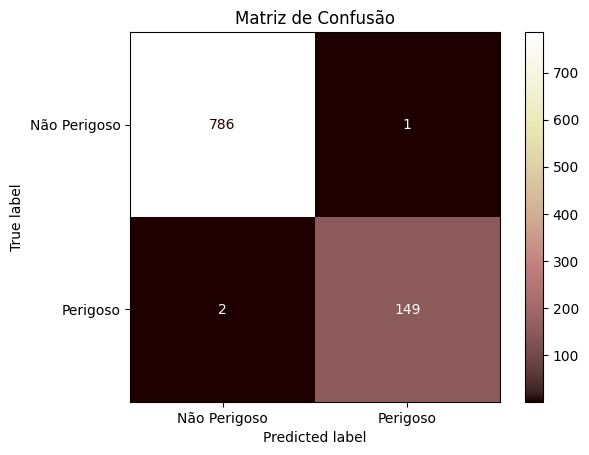

In [21]:
# Fazendo a Divisão em treino e teste para plotar a matriz de confusão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ajustar o GridSearchCV com os dados de treino
grid_search.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Perigoso', 'Perigoso'])
disp.plot(cmap=plt.cm.pink)
plt.title('Matriz de Confusão')
plt.show()